In [1]:
import pandas as pd
df=pd.read_csv("D:\\spam.csv", encoding="latin1")


In [2]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
#df=df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
df=df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [4]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
dict={"v1" : "target", "v2": "text"}

In [6]:
df.rename(columns=dict, inplace=True)

In [7]:
dict2= {"ham" :0, "spam":1}

In [8]:
df["target"]=df["target"].replace(dict2)

C:\Users\HARMAN\AppData\Local\Temp\ipykernel_3492\1778692932.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["target"]=df["target"].replace(dict2)


In [9]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [11]:
df.duplicated().sum()

403

In [12]:
df=df.drop_duplicates()

In [13]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [14]:
#standard scaling 

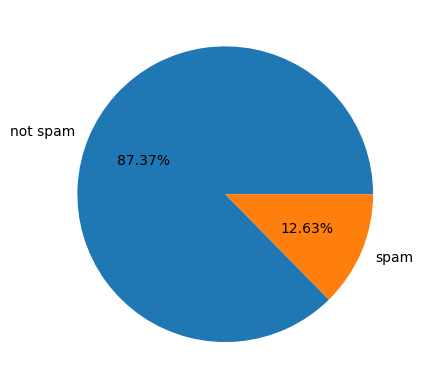

In [15]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(), labels=["not spam", "spam"], autopct="%0.2f%%")
plt.show()

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize


In [17]:
#creating new column

df["num_words"]=df["text"].apply(lambda x: len(word_tokenize(x)))

In [18]:
df.head()

,target,text,num_words
0,0,"Go until jurong point, crazy.. Available only ...",24
1,0,Ok lar... Joking wif u oni...,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,0,U dun say so early hor... U c already then say...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",15


In [19]:
df["num_sent"]=df["text"].apply(lambda x: len(sent_tokenize(x)))

In [20]:
df.head()

,target,text,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",24,2
1,0,Ok lar... Joking wif u oni...,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2
3,0,U dun say so early hor... U c already then say...,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1


In [21]:
df.describe()

,target,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,0.126330,18.455794,1.965564
std,0.332253,13.324758,1.448541
min,0.000000,1.000000,1.000000
25%,0.000000,9.000000,1.000000
50%,0.000000,15.000000,1.000000
75%,0.000000,26.000000,2.000000
max,1.000000,220.000000,38.000000


In [22]:
df[df["target"]==0][["num_words", "num_sent"]]

,num_words,num_sent
0,24,2
1,8,2
3,13,1
4,15,1
6,18,2
...,...,...
5565,4,1
5568,9,1
5569,15,2
5570,27,1


In [23]:
df[df["target"]==0][["num_words", "num_sent"]].describe()
#statistics of not spam messages

,num_words,num_sent
count,4516.000000,4516.000000
mean,17.123782,1.820195
std,13.493970,1.383657
min,1.000000,1.000000
25%,8.000000,1.000000
50%,13.000000,1.000000
75%,22.000000,2.000000
max,220.000000,38.000000


In [24]:
df[df["target"]==1][["num_words", "num_sent"]].describe()
#statistics of spam messages

,num_words,num_sent
count,653.000000,653.000000
mean,27.667688,2.970904
std,7.008418,1.488425
min,2.000000,1.000000
25%,25.000000,2.000000
50%,29.000000,3.000000
75%,32.000000,4.000000
max,46.000000,9.000000


In [62]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
words=stopwords.words("english")

In [26]:
df.head()

,target,text,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",24,2
1,0,Ok lar... Joking wif u oni...,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2
3,0,U dun say so early hor... U c already then say...,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1


In [96]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        temp=ps.stem(i)
        y.append(temp)
    text=y[:]
    y.clear()
    for i in text:
        if i not in words:
            y.append(i)
            
    return " ".join(y)

In [98]:
transform_text("Connecting is had , 12 ")

'connect 12'

In [86]:
df["transformed"]=df["text"].apply(transform_text)

In [88]:
df.head()

,target,text,num_words,num_sent,transformed
0,0,"Go until jurong point, crazy.. Available only ...",24,2,go jurong point crazi avail onli bugi n great ...
1,0,Ok lar... Joking wif u oni...,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,nah think goe usf live around though


In [90]:
df["text"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [100]:
#!pip install wordcloud
from wordcloud import WordCloud

In [112]:
wc=WordCloud(width=600, height=600, background_color="white", min_font_size=12, max_words=50)

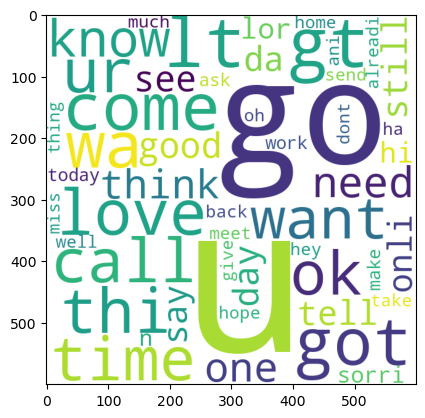

In [114]:
not_spam=wc.generate(df[df["target"]==0]["transformed"].str.cat(sep=" "))
plt.imshow(not_spam)

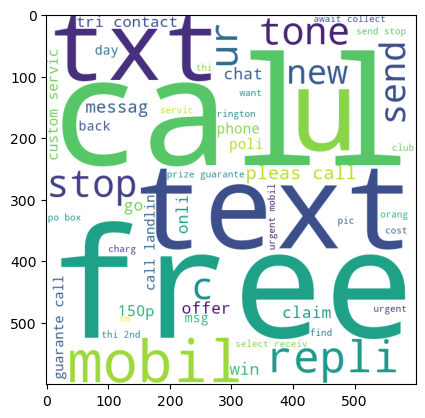

In [118]:
spam=wc.generate(df[df["target"]==1]["transformed"].str.cat(sep=" "))
plt.imshow(spam)

In [122]:
from collections import Counter
spam_corpus=[]
for msg in df[df["target"]==1]["transformed"].tolist():
    for word in msg.split():
        spam_corpus.append(word)
#Counter(spam_corpus).most_common(30)
spamcommon=pd.DataFrame(Counter(spam_corpus).most_common(30))      
spamcommon 

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [124]:
notspam_corpus=[]
for msg in df[df["target"]==0]["transformed"].tolist():
    for word in msg.split():
        notspam_corpus.append(word)
#Counter(spam_corpus).most_common(30)
notspam=pd.DataFrame(Counter(notspam_corpus).most_common(30))      
notspam

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


In [126]:
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer()

In [128]:
X=cv.fit_transform(df["transformed"])

In [134]:
X=X.toarray()

In [136]:
y=df["target"]

In [138]:
#cv.get_feature_names_out()

array(['008704050406', '0089', '0121', ..., 'åôrent', 'ìä', 'ìï'],
      dtype=object)

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [142]:
gnb=GaussianNB()

In [144]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25)

In [146]:
gnb.fit(X_train, y_train)

GaussianNB()

In [148]:
gnb.score(X_test, y_test)

0.8669760247486465

In [150]:
gnb_predict=gnb.predict(X_test)
#y_test

In [158]:
confusion_matrix(y_test, gnb_predict)

array([[986, 157],
       [ 15, 135]], dtype=int64)

In [162]:
precision_score(y_test, gnb_predict)

0.4623287671232877

In [164]:
bnb=BernoulliNB()

In [166]:
bnb.fit(X_train, y_train)

BernoulliNB()

In [170]:
bnb_predict=bnb.predict(X_test)

In [174]:
print(confusion_matrix(y_test, bnb_predict))
precision_score(y_test, bnb_predict)

[[1138    5]
 [  34  116]]


0.9586776859504132

In [ ]:
# import dill

In [179]:
text=input("Enter msg to be checked")
text=transform_text(text)

vectorized=cv.transform([text]).toarray()
gnb.predict(vectorized)

Enter msg to be checked discount profit discount


array([1], dtype=int64)